<a href="https://colab.research.google.com/github/anuj031297/Finance_Business_EDA/blob/main/Financial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Finance Project**

Data Description: The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.



Context: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps

In [56]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#Load the CSV file
file_path = '/content/drive/MyDrive/Bank_Personal_Loan_Modelling.xlsx'
df = pd.read_excel(file_path,1)

In [58]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [59]:
df.shape

(5000, 14)

In [60]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [61]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [62]:
df.drop(['ID','ZIP Code'],axis = 1, inplace = True)

In [63]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [64]:
fig = ps.box(df, y= ['Age','Experience','Income','Family','Education'])
fig.show()

In [65]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [66]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

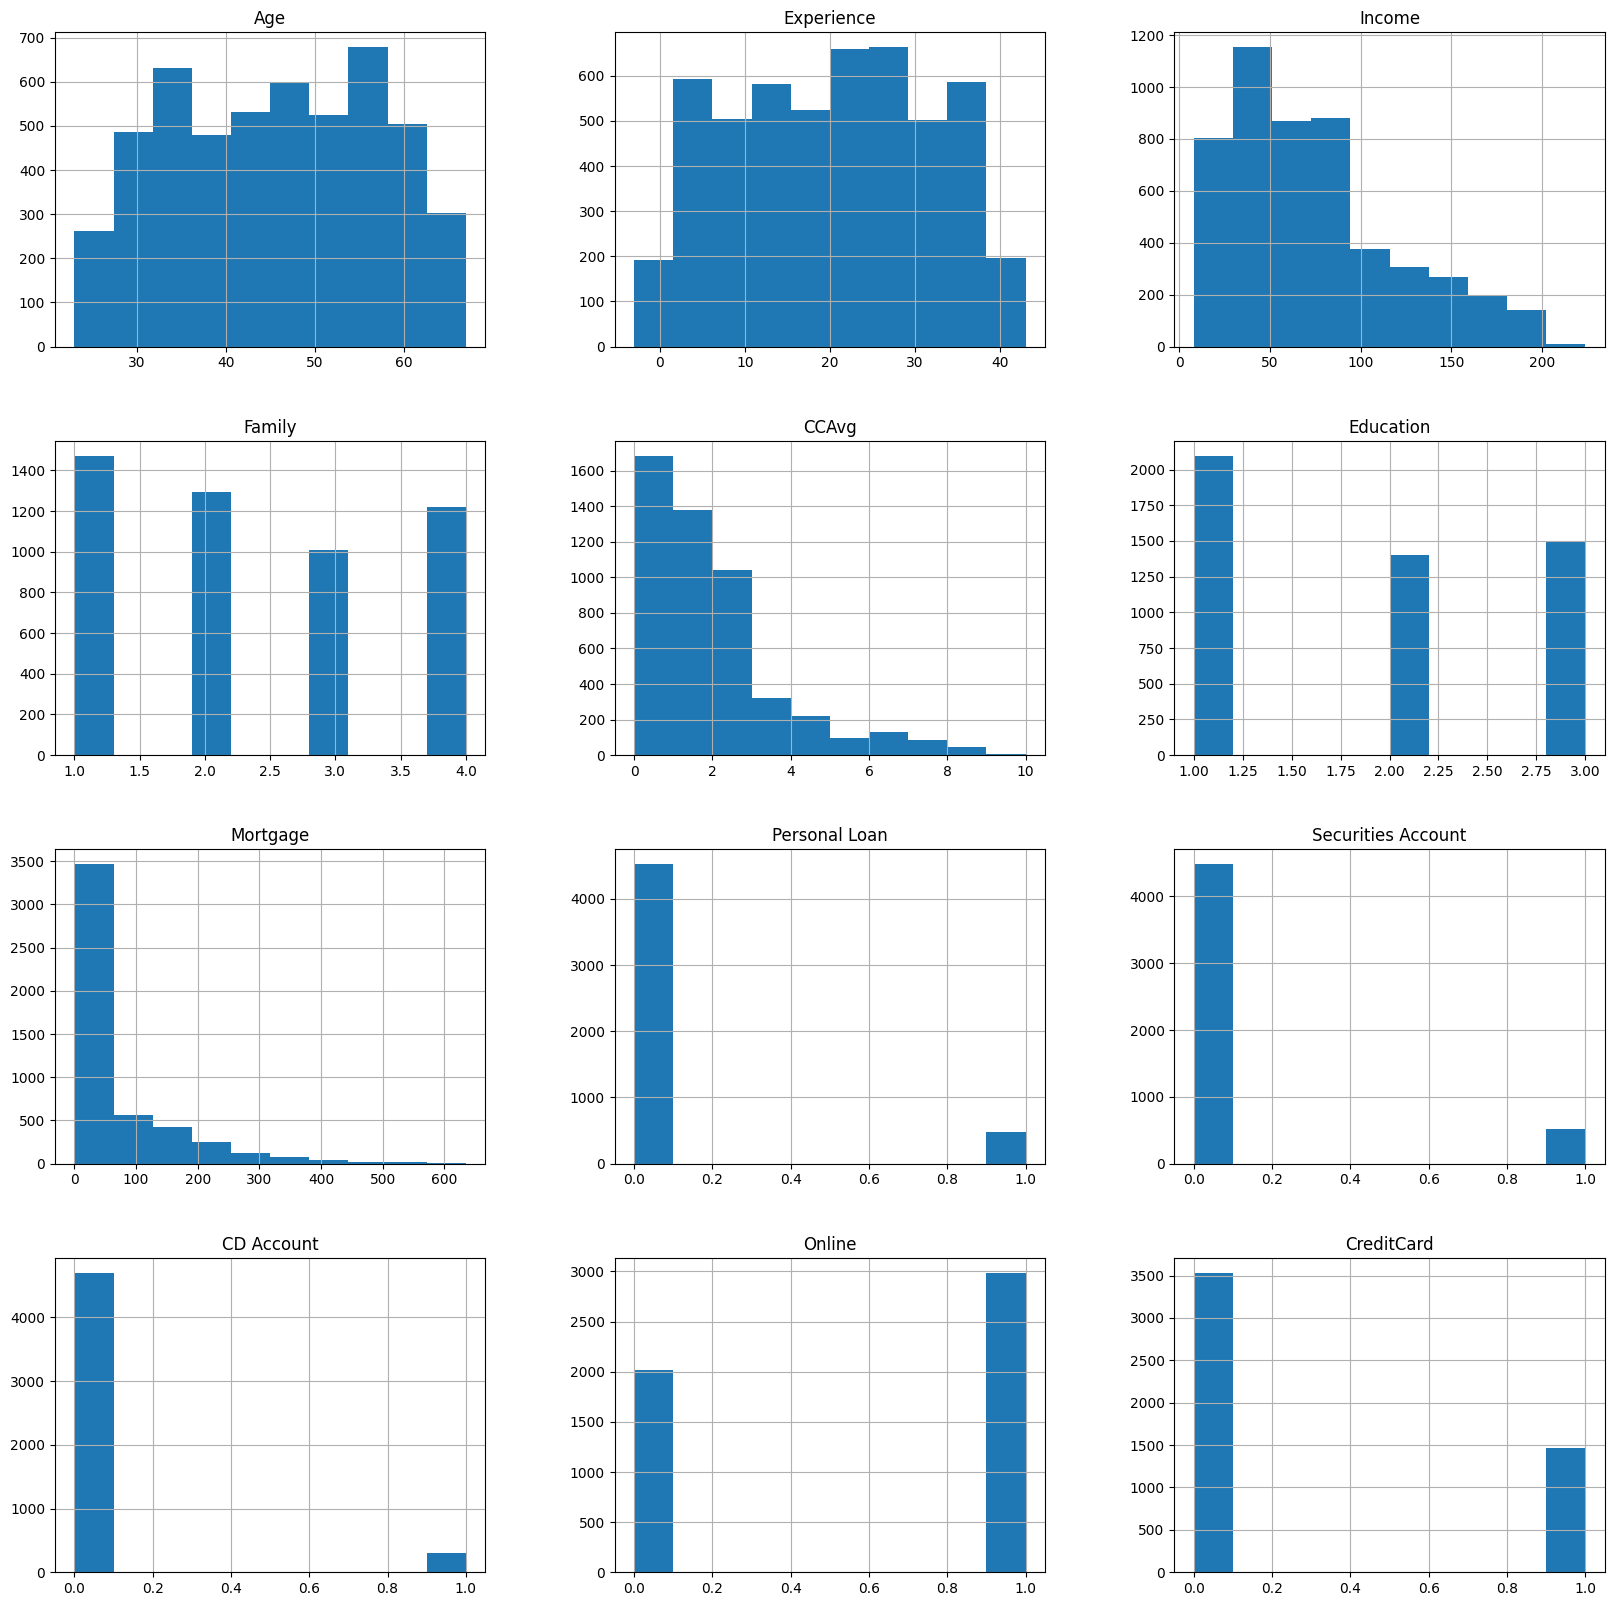

In [67]:
df.hist(figsize = (20,20))

<ipython-input-68-c295d2895934>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

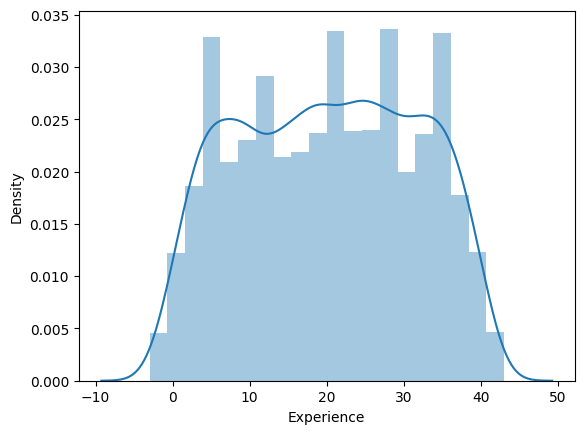

In [68]:
sns.distplot(df['Experience'])

While we construct histplot, boxplot we conclude that experience contains negative value so it is not possible in practical so we have to handle these error.

### **Handling the negative data in expereince**

In [69]:
df['Experience'].mean()

20.1046

In [70]:
negative_exp = df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [71]:
negative_exp.shape

(52, 12)

<ipython-input-72-38b8acee6dc3>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

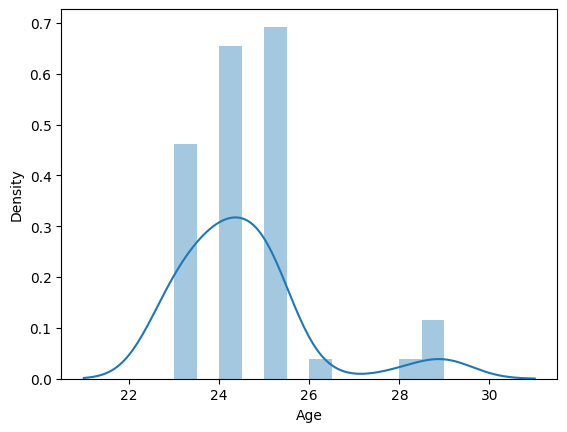

In [72]:
sns.distplot(negative_exp['Age'])

From Above we know that -ve experience holder mostly has the age group around 21-25 year so these age group also give us customer for loan. We can replace these negative value to mean of experience.

In [73]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [74]:
negative_exp.size

624

In [75]:
print("There are {} recoreds which has negative values for experience, approx {} %".format(negative_exp.size, ((negative_exp.size/df.size)*100)))

There are 624 recoreds which has negative values for experience, approx 1.04 %


In [76]:
data = df.copy()

In [77]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [78]:
#Replace all negative value with the mean value
data['Experience'] = np.where(data['Experience'] < 0, data['Experience'].mean(), data['Experience'])

In [79]:
#No customer with -ve experience present in data
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [80]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048719,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.048719,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.018097,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

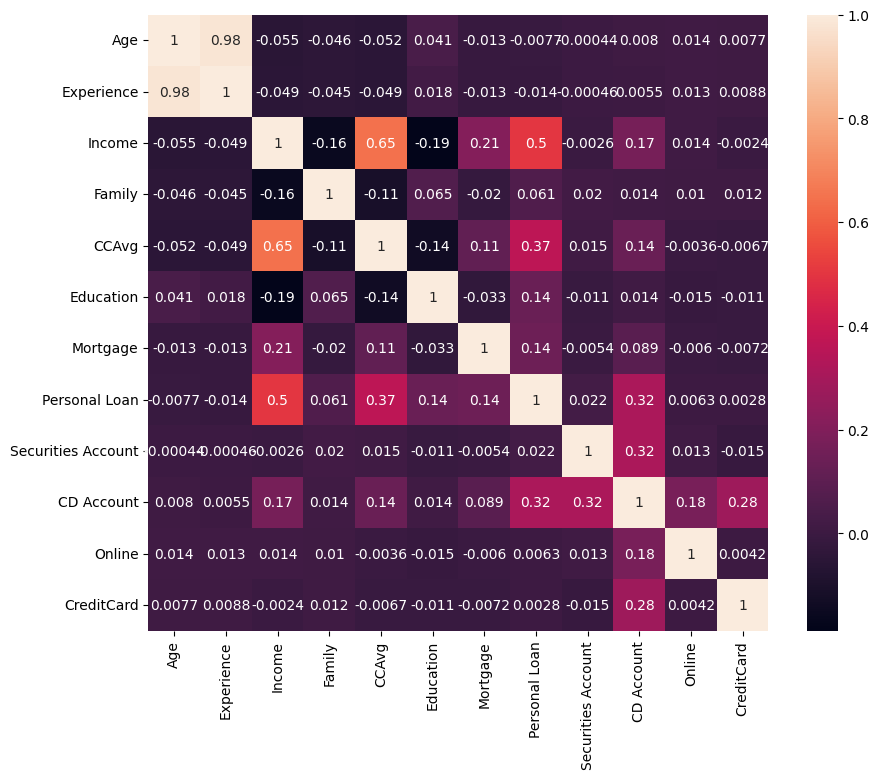

In [81]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)

Here we can see that Age and experience have correlation nearly 1 so we can drop one of the columns so Age is mandatory aspect in Loan industry but Experience is not majorly need so we can drop that column.

In [82]:
data = data.drop(['Experience'], axis = 1)

In [83]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [84]:
#Education
data["Education"].unique()

array([1, 2, 3])

In [85]:
def education_qualification(x):
  if x==1:
    return 'Undergraduate'
  elif x==2:
    return 'Graduate'
  elif x==3:
    return 'Professional'

In [86]:
data['EDU'] = data['Education'].apply(education_qualification)

In [87]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [88]:
education_dis = data.groupby('EDU')['Age'].count()

In [89]:
fig = ps.pie(data, values= education_dis, names = education_dis.index, title = 'Pie Chart')
fig.show()

In [90]:
#Income
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [91]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [92]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [93]:
def security(y):
  if(y['Securities Account'] == 1) &(y['CD Account']==1):
    return 'Hold Security Account & Deposite'
  if(y['Securities Account'] == 0) &(y['CD Account']==0):
    return 'Does not Hold Securitites & Deposite Account'
  if(y['Securities Account'] == 1) &(y['CD Account']==0):
    return 'Hold only Securitites Account'
  if(y['Securities Account'] == 0) &(y['CD Account']==1):
    return 'Hold only Deposite Account'

In [94]:
data['Account_holder_category'] = data.apply(security, axis = 1)

In [95]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate,Hold only Securitites Account
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate,Hold only Securitites Account
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate,Does not Hold Securitites & Deposite Account
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not Hold Securitites & Deposite Account
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not Hold Securitites & Deposite Account


In [96]:
values = data['Account_holder_category'].value_counts()
values.index

Index(['Does not Hold Securitites & Deposite Account',
       'Hold only Securitites Account', 'Hold only Deposite Account',
       'Hold Security Account & Deposite'],
      dtype='object')

In [97]:
fig = ps.pie(data, values= values, names = values.index, title = 'Pie Chart')
fig.show()

In [98]:
ps.box(data, x= 'Education', y = 'Income', facet_col = 'Personal Loan')

<ipython-input-99-4bfa9dc87ae6>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-99-4bfa9dc87ae6>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




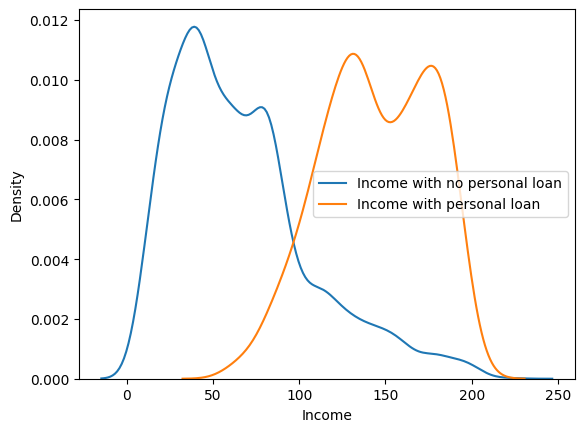

In [99]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False, label = 'Income with no personal loan')
sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False, label = 'Income with personal loan')

plt.legend()

In [100]:
def plot(col1, col2, lable1, lable2, title):
  sns.distplot(data[data[col2] == 0][col1], hist = False, label = lable1)

  sns.distplot(data[data[col2] == 1][col1], hist = False, label = lable2)

  plt.legend()
  plt.title(title)

<ipython-input-100-23bc26f29cfa>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-100-23bc26f29cfa>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




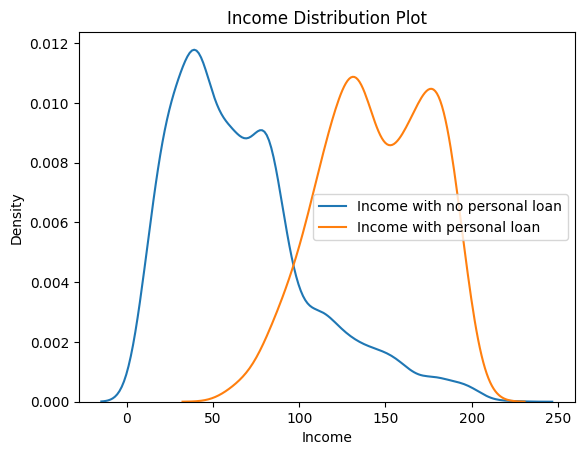

In [101]:
plot('Income','Personal Loan', 'Income with no personal loan', 'Income with personal loan', "Income Distribution Plot" )

<ipython-input-100-23bc26f29cfa>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-100-23bc26f29cfa>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




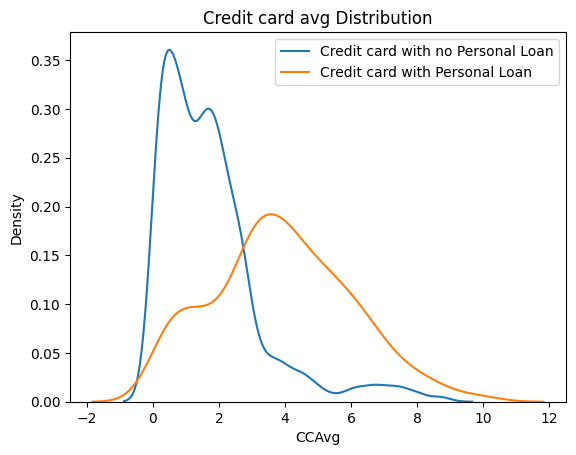

In [102]:
plot("CCAvg",'Personal Loan',
     "Credit card with no Personal Loan",
     "Credit card with Personal Loan", "Credit card avg Distribution")

In [103]:
col = ['Securities Account', 'Online' , 'Account_holder_category', 'CreditCard']

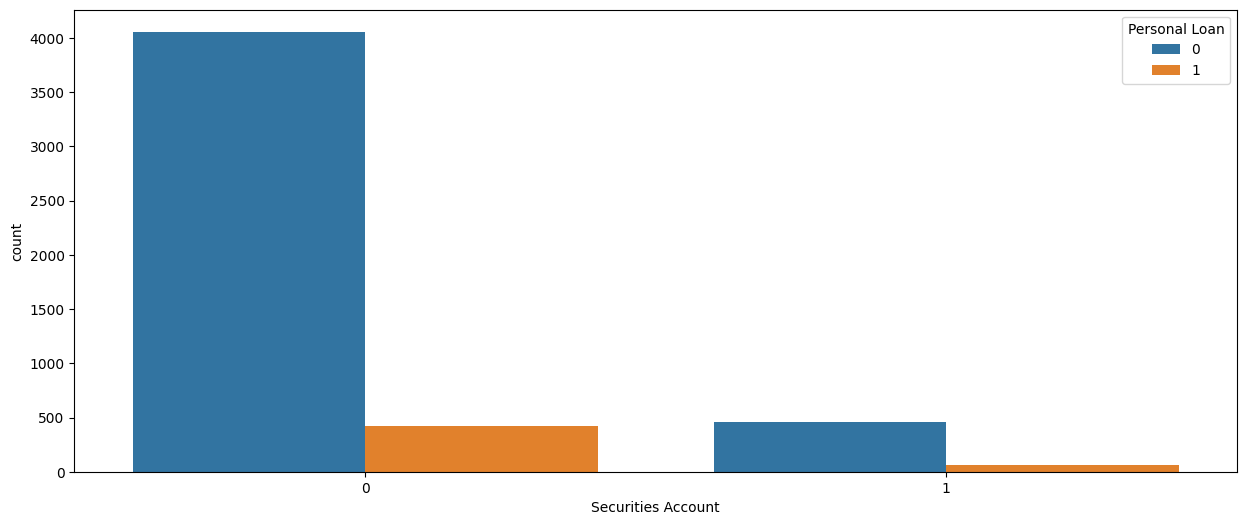

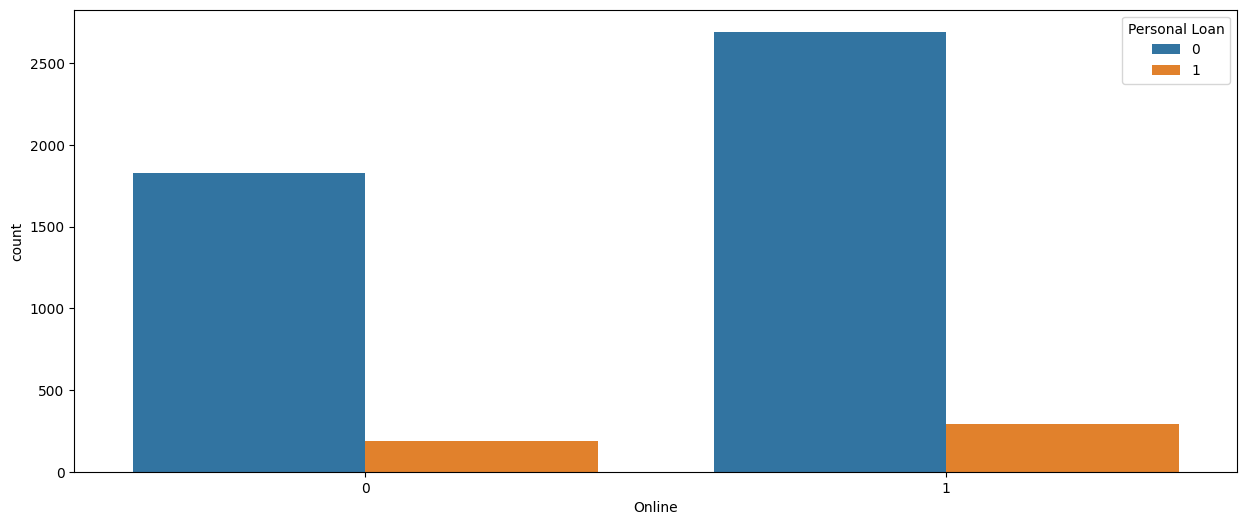

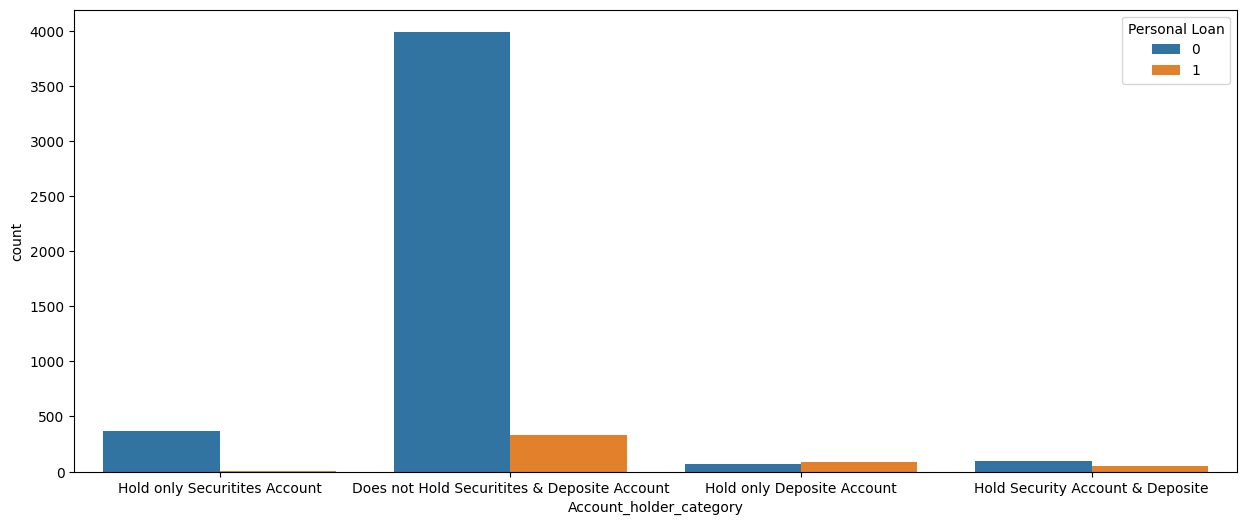

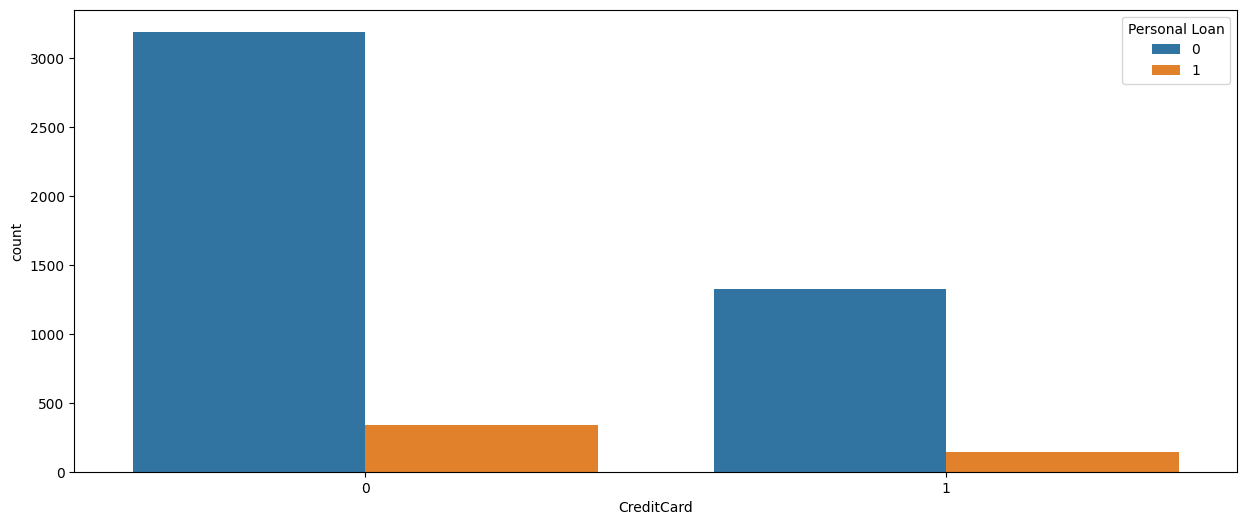

In [108]:
for i in col:
  plt.figure(figsize = (15,6))
  sns.countplot(x= i, data = data, hue= "Personal Loan")



*   In Securities Account vs Count graph we can see that those people who doesn't have security account but whose income and age is mid 30s will be good reach out customer for Personal Loan.

*   In online vs Count, we can say that most of the people doing online transactions but doesn't have Personal Loan so we can also focus on this section to reach out potential customers.



In [105]:
from scipy.stats import zscore

In [106]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

IQR = q3 - q1
print(IQR)

Age                    20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64


<ipython-input-106-e1ee907e3682>:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-106-e1ee907e3682>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [107]:
#Log Normal Transform

data_1 =  data[['Income','CCAvg']]
data_1 = np.log(data_1 + 1)
data_1

,Income,CCAvg
0,3.912023,0.955511
1,3.555348,0.916291
2,2.484907,0.693147
3,4.615121,1.308333
4,3.828641,0.693147
...,...,...
4995,3.713572,1.064711
4996,2.772589,0.336472
4997,3.218876,0.262364
4998,3.912023,0.405465


## **CONCLUSION**

*   We can see in Histogram of Personal Loan most of the people doesn't take
Personal Loan so we have more potential customer to target.

*   Education variable doesn't mandatory criteria for the Personal Loan. But we get to know how many customer comes under which education section so sales team can improvise according to that while approaching customer for Personal Loan.

*   Most of the people have Income but doesn't have personal loan so we can target these customer some may have age issue beside that other can be our potential customer for Personal Loan. As Income are important variable for Loan Sector because it's first eligibility criteria to start processing Loan



*   Case of customer having Credit card but doesn't have personal loan. Customer ranges from Credit Card Average from 1 to 3 are highest in number who deosn't take Personal Loan. So Customer lie on this scale can be approach for Personal Loan basis of their Credit Account from where we also get to know what's their credit score and eligibility for the Loan.

*   In Securities Account vs Count graph we can see that those people who doesn't have security account are higher in count for not having Personal Loan so on the basis of their eligibilty we can approach them for Personal Loan.



*   In online vs Count, we can say that most of the people doing online transactions but doesn't have Personal Loan so we can also focus on this section to reach out potential customers.





